In [194]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, auc
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, auc

In [154]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [155]:
train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [156]:
train.shape

(252000, 13)

In [157]:
train.columns

Index(['Id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [159]:
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization

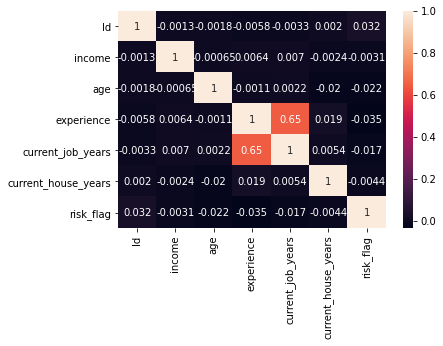

In [160]:
corr = train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [161]:
numerical = [var for var in train.columns if train[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
print('The numerical variables are :', numerical)



There are 7 numerical variables
The numerical variables are : ['Id', 'income', 'age', 'experience', 'current_job_years', 'current_house_years', 'risk_flag']


In [162]:
train[numerical].head()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,3,13,0
1,2,7574516,40,10,9,13,0
2,3,3991815,66,4,4,10,0
3,4,6256451,41,2,2,12,1
4,5,5768871,47,11,3,14,1


In [163]:
train[numerical].isnull().sum()

Id                     0
income                 0
age                    0
experience             0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

In [164]:
categorical = [var for var in train.columns if train[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 6 categorical variables
The categorical variables are : ['married', 'house_ownership', 'car_ownership', 'profession', 'city', 'state']


In [165]:
train[categorical].head()

,married,house_ownership,car_ownership,profession,city,state
0,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh
1,single,rented,no,Software_Developer,Parbhani,Maharashtra
2,married,rented,no,Technical_writer,Alappuzha,Kerala
3,single,rented,yes,Software_Developer,Bhubaneswar,Odisha
4,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu


In [166]:
train[categorical].isnull().sum()

married            0
house_ownership    0
car_ownership      0
profession         0
city               0
state              0
dtype: int64

In [167]:
for var in categorical: 
    print(train[var].value_counts())
    print(train[var].value_counts()/np.float(len(train)))
    print()

single     226272
married     25728
Name: married, dtype: int64
single     0.897905
married    0.102095
Name: married, dtype: float64

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64
rented          0.920230
owned           0.051262
norent_noown    0.028508
Name: house_ownership, dtype: float64

no     176000
yes     76000
Name: car_ownership, dtype: int64
no     0.698413
yes    0.301587
Name: car_ownership, dtype: float64

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager            

In [168]:


# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(train[var].unique()), ' labels')



married  contains  2  labels
house_ownership  contains  3  labels
car_ownership  contains  2  labels
profession  contains  51  labels
city  contains  317  labels
state  contains  29  labels


In [169]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

train['married'] = label_encoder.fit_transform(train['married'])
test['married'] = label_encoder.fit_transform(test['married'])
train['house_ownership'] = label_encoder.fit_transform(train['house_ownership'])
test['house_ownership'] = label_encoder.fit_transform(test['house_ownership'])
train['car_ownership'] = label_encoder.fit_transform(train['car_ownership'])
test['car_ownership'] = label_encoder.fit_transform(test['car_ownership'])
train['profession'] = label_encoder.fit_transform(train['profession'])
test['profession'] = label_encoder.fit_transform(test['profession'])
train['city'] = label_encoder.fit_transform(train['city'])
test['city'] = label_encoder.fit_transform(test['city'])
train['state'] = label_encoder.fit_transform(train['state'])
test['state'] = label_encoder.fit_transform(test['state'])
train.head()



,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1


In [170]:
test.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,1,2,0,26,181,28,4,13
1,2,1215004,25,5,1,2,0,24,131,14,5,10
2,3,8901342,50,12,1,2,0,30,290,14,9,14
3,4,1944421,49,9,0,2,1,1,171,14,3,12
4,5,13429,25,18,1,2,1,12,39,28,13,11


In [171]:
train.shape

(252000, 13)

In [172]:
train['age'].describe()

count    252000.000000
mean         49.954071
std          17.063863
min          21.000000
25%          35.000000
50%          50.000000
75%          65.000000
max          79.000000
Name: age, dtype: float64

In [173]:
train['age'] = pd.cut(x = train['age'], bins = [0,20,25,30,35,40,45,50, 55, 60, 65,70,75,80], labels = [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12])
train['age'] = train['age'].astype('int64') 
train['age'].isnull().sum()

0

In [174]:
test['age'] = pd.cut(x = test['age'], bins = [0,20,25,30,35,40,45,50, 55, 60, 65,70,75,80], labels = [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12])
test['age'] = test['age'].astype('int64') 
test['age'].isnull().sum()

0

In [175]:
train['income'].describe()

count    2.520000e+05
mean     4.997117e+06
std      2.878311e+06
min      1.031000e+04
25%      2.503015e+06
50%      5.000694e+06
75%      7.477502e+06
max      9.999938e+06
Name: income, dtype: float64

In [176]:
train[numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Id                   252000 non-null  int64
 1   income               252000 non-null  int64
 2   age                  252000 non-null  int64
 3   experience           252000 non-null  int64
 4   current_job_years    252000 non-null  int64
 5   current_house_years  252000 non-null  int64
 6   risk_flag            252000 non-null  int64
dtypes: int64(7)
memory usage: 13.5 MB


In [177]:
mx = MinMaxScaler()
col = 'income'
train[col] = mx.fit_transform(train[col].values.reshape(-1,1))
test[col] = mx.transform(test[col].values.reshape(-1,1))

In [178]:
train['experience'].describe()

count    252000.000000
mean         10.084437
std           6.002590
min           0.000000
25%           5.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: experience, dtype: float64

In [179]:
train['experience'].value_counts()

6     13158
9     12936
12    12800
18    12601
10    12503
5     12441
14    12369
19    12287
17    12131
16    12106
3     12069
15    11993
4     11807
13    11713
1     11575
11    11449
20    11350
8     11350
7     11232
2     11087
0     11043
Name: experience, dtype: int64

In [180]:
train['experience'].value_counts()/np.float(len(train))

6     0.052214
9     0.051333
12    0.050794
18    0.050004
10    0.049615
5     0.049369
14    0.049083
19    0.048758
17    0.048139
16    0.048040
3     0.047893
15    0.047591
4     0.046853
13    0.046480
1     0.045933
11    0.045433
20    0.045040
8     0.045040
7     0.044571
2     0.043996
0     0.043821
Name: experience, dtype: float64

In [181]:
mx = MinMaxScaler()
col = 'experience'
train[col] = mx.fit_transform(train[col].values.reshape(-1,1))
test[col] = mx.transform(test[col].values.reshape(-1,1))

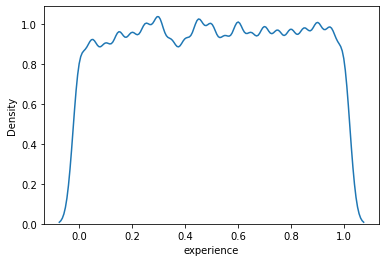

In [182]:
sns.kdeplot(train['experience'])

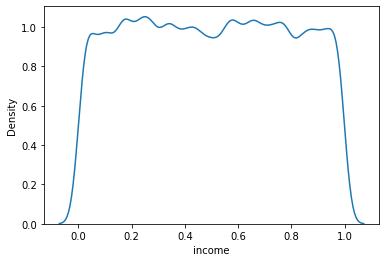

In [183]:
sns.kdeplot(train['income'])

In [184]:
train['current_job_years'].describe()

count    252000.000000
mean          6.333877
std           3.647053
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          14.000000
Name: current_job_years, dtype: float64

In [185]:
train['current_job_years'].value_counts()

3     29460
4     28339
5     25091
6     23491
7     19925
8     18874
9     17132
10    15768
11    13595
1     11575
2     11087
0     11043
12    10605
13     9099
14     6916
Name: current_job_years, dtype: int64

In [186]:
train['current_job_years'].value_counts()/np.float(len(train))

3     0.116905
4     0.112456
5     0.099567
6     0.093218
7     0.079067
8     0.074897
9     0.067984
10    0.062571
11    0.053948
1     0.045933
2     0.043996
0     0.043821
12    0.042083
13    0.036107
14    0.027444
Name: current_job_years, dtype: float64

In [187]:
mx = MinMaxScaler()
col = 'experience'
train[col] = mx.fit_transform(train[col].values.reshape(-1,1))
test[col] = mx.fit_transform(test[col].values.reshape(-1,1))

In [188]:
train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,0.129487,1,0.15,1,2,0,33,251,13,3,13,0
1,2,0.757206,4,0.50,1,2,0,43,227,14,9,13,0
2,3,0.398564,10,0.20,0,2,0,47,8,12,4,10,0
3,4,0.625263,5,0.10,1,2,1,43,54,17,2,12,1
4,5,0.576454,6,0.55,1,2,0,11,296,22,3,14,1


In [189]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   252000 non-null  int64  
 1   income               252000 non-null  float64
 2   age                  252000 non-null  int64  
 3   experience           252000 non-null  float64
 4   married              252000 non-null  int64  
 5   house_ownership      252000 non-null  int64  
 6   car_ownership        252000 non-null  int64  
 7   profession           252000 non-null  int64  
 8   city                 252000 non-null  int64  
 9   state                252000 non-null  int64  
 10  current_job_years    252000 non-null  int64  
 11  current_house_years  252000 non-null  int64  
 12  risk_flag            252000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 25.0 MB


In [190]:
y = train.loc[:,'risk_flag']
X = train.drop('risk_flag', axis = 1)
X

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,0.129487,1,0.15,1,2,0,33,251,13,3,13
1,2,0.757206,4,0.50,1,2,0,43,227,14,9,13
2,3,0.398564,10,0.20,0,2,0,47,8,12,4,10
3,4,0.625263,5,0.10,1,2,1,43,54,17,2,12
4,5,0.576454,6,0.55,1,2,0,11,296,22,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,0.815303,5,0.65,1,2,0,45,162,28,6,11
251996,251997,0.283620,2,0.50,1,2,0,3,251,13,6,11
251997,251998,0.451682,6,0.35,1,2,0,17,144,14,7,12
251998,251999,0.650356,5,0.00,1,2,0,27,233,18,0,10


In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [192]:
X_train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
13714,13715,0.813037,11,0.35,1,2,0,33,147,22,6,13
51718,51719,0.791355,9,0.40,1,2,0,40,134,6,3,12
99982,99983,0.626822,6,0.60,1,2,0,19,254,13,7,10
107150,107151,0.182371,7,0.65,1,2,1,41,312,0,12,14
94564,94565,0.795207,3,0.35,1,2,1,19,26,22,4,12


In [193]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train) 
result = model.score(X_test, y_test)

print('Model accuracy score: {0:0.4f}'. format(result))



Model accuracy score: 0.9081


In [196]:
roc_auc_score(y_train, model.predict(X_train))

0.9999596725410331

In [198]:
roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

0.9244566131796725

In [199]:
y_pred = model.predict(test)

In [200]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [202]:
sub = pd.DataFrame(y_pred,columns = ['risk_flag'],index = [i+1 for i in range(test.shape[0])])

sub.index.name = 'id'
sub.head()

,risk_flag
id,
1,0
2,0
3,0
4,0
5,0


In [203]:
sub.to_csv('rf_final.csv')